Claire Phillips

1010781566

https://colab.research.google.com/drive/1SAv6WU6M4dOBOh5yBdK-kuqcZZN3iaHS?usp=sharing

In [ ]:
pip install torch

In [ ]:
import pandas as pd
import sklearn as sk
import numpy as np
import torch
import spacy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch.optim as optim
from sklearn.metrics import f1_score
import torch.optim.lr_scheduler as lr_scheduler

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')

Mounted at /content/drive


2. Dataset description: We will use the same dataset from assignment #1. The dataset
consists of data from 416 liver patient records and 167 non liver patient records
collected from North East of Andhra Pradesh, India. 10 variables for each patient are
recorded, and the true label is in column Dataset. The data is obtained through
https://www.kaggle.com/datasets/uciml/indian-liver-patient-records.

In [ ]:
data = pd.read_csv('indian_liver_patient.csv').fillna(0) #reading data and filling null values with 0
# Turning Male/Female into a binary signal.


3. Data preparation:
Use the same function used in assignment #1 to split the training and testing data.
This time, we will evaluate the training and testing with and without data
normalization. For this part use the sklearn standarizer and normalizer to
normalize the data.

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer

In [ ]:
scaler = StandardScaler()
normalizer = Normalizer()

In [ ]:
one_hot = pd.get_dummies(data['Gender'])
data[['Female','Drop']]= one_hot # one column for male and 1 column for female
data = data.drop(['Gender','Drop'],axis=1) # we can drop the original gender column and "drop" which is basically the male column (the exact inverse of female)
data = data.rename(columns={"Female": "Gender"}, errors="raise") #remane Female to Gender
data['Dataset']= data['Dataset']-1. #this metric is eitherr 1 or 2 but we need it to be 0 or 1

In [ ]:
train,test = sk.model_selection.train_test_split(data, test_size=0.3) #split data into train and test

In [ ]:
train_X = train.loc[:,train.columns != 'Dataset'] #predicting columns for train
train_y = train['Dataset'] #target
test_X = test.loc[:,test.columns != 'Dataset'] #predicting columns for test
test_y = test['Dataset'] #predicting columns for test

In [ ]:
train_X_scaled = pd.DataFrame(scaler.fit_transform(train_X.values), columns=train_X.columns, index=train_X.index)
test_X_scaled = pd.DataFrame(scaler.fit_transform(test_X.values), columns=test_X.columns, index=test_X.index)

In [ ]:
train_X_norm_scaled = pd.DataFrame(scaler.fit_transform(train_X_scaled.values), columns=train_X_scaled.columns, index=train_X_scaled.index)
test_X_norm_scaled = pd.DataFrame(scaler.fit_transform(test_X_scaled.values), columns=test_X_scaled.columns, index=test_X_scaled.index)

In [ ]:
train_X_scaled

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender
7,-0.997112,-0.410241,-0.412344,-0.335255,-0.363760,-0.306658,0.196291,0.562840,0.406804,1.778557
208,1.536640,-0.410241,-0.412344,-0.261833,-0.150537,-0.047170,-0.368362,-0.497847,-0.868299,1.778557
254,-0.440923,-0.448213,-0.484302,-0.539203,0.051751,-0.275767,0.572726,1.358355,1.317592,1.778557
481,-0.008331,-0.144441,-0.052557,-0.008938,0.281376,0.796167,0.760944,1.093184,0.710400,-0.562254
516,0.918652,-0.410241,-0.412344,-0.473940,-0.352825,-0.266500,0.196291,-0.232675,-0.503984,-0.562254
...,...,...,...,...,...,...,...,...,...,...
118,-0.811715,2.437621,1.998230,-0.017096,6.940490,4.601996,-0.838906,-0.497847,0.103208,-0.562254
177,1.845634,2.228778,2.717804,3.001337,-0.052127,-0.210895,-1.121233,-1.293362,-0.807580,-0.562254
298,-0.873514,-0.372270,-0.412344,-0.384202,-0.298153,-0.294302,1.325597,0.828012,-0.200388,1.778557
201,0.238865,-0.467198,-0.484302,-0.269991,-0.166939,-0.176914,-1.403560,-1.028191,-0.200388,-0.562254


In [ ]:
train_y.sum()/len(train_y)

0.2867647058823529

4. Model:
Build a fully connected neural network using pytorch. Choosing the number of layers,
neurons, and other hyperparameters is left for you to experiment with their effect on the
performance. It is recommended to use Relu activation function for the hidden layers, Sigmoid
activation function for the output layer, binary cross entropy as loss function, and Adam
optimizer with learning rate of 0.001 for the training process.

In [ ]:
class Model(torch.nn.Module):
    def __init__(self,parameter_dict):
        super().__init__()

        #TO DO
        #initial_embedding = torch.rand(embedding_size, vocab_size)
        self.parameter_dict= parameter_dict
        self.relu = torch.nn.ReLU()
        for x in range(len(parameter_dict['layers_output_size'])):
          if x==0:
            insize = parameters_dict['in_features']
          else: insize = outsize
          if x==len(parameter_dict['layers_output_size'])-1:
            outsize = 1
          else:
            outsize = parameter_dict['layers_output_size'][x]
          exec("self.layer_"+ str(x) + " = torch.nn.Linear(in_features=insize,out_features=outsize)")
        self.Sigmoid = torch.nn.Sigmoid()
        #TO DO

    def forward(self, x):
        """
        x: torch.tensor of shape (bsz), bsz is the batch size
        """
        for i in range(len(self.parameter_dict['layers_output_size'])):
          x = self.relu(x)
          x = eval('self.layer_'+str(i)+'(x)')
        sigmoid_logits = self.Sigmoid(x)
        return sigmoid_logits

In [ ]:

def accurate_count(sigmoid_results, y):
  rounded_results = torch.round(sigmoid_results).squeeze()
  accurate = torch.eq(rounded_results.int(),y.int())
  return accurate.sum()

def f1_score_count(sigmoid_results,y):
  score_count = f1_score(torch.round(sigmoid_results).int().squeeze().detach().numpy(),
                                y.detach().numpy())*y.size(0)
  return score_count

def model_test_or_validate(dataloader, network,loss_fn):
  losses = 0
  lens = 0
  accuracy = 0
  f1_scores = 0
  for batch, (X,y) in enumerate(dataloader):
    sigmoid_results = network(X)
    loss = loss_fn(sigmoid_results, y.float().unsqueeze(1))
    losses += loss*y.size(0)
    accuracy +=accurate_count(sigmoid_results,y)
    f1_scores += f1_score_count(sigmoid_results,y)
    lens += y.size(0)
  acc = accuracy/lens
  f1_score = f1_scores/lens

  return float(losses/lens), float(acc), float(f1_score)


def train_model(train_dataloader, test_dataloader, parameter_dict):
    # Set up a model with Skip-gram (predict context with word)
    # textlist: a list of the strings

    # Create the training data

    epochs = parameter_dict['epochs']

    # instantiate the network & set up the optimizer
    # TO DO

    network = Model(parameter_dict)
    network.train()
    loss_fn = torch.nn.BCELoss()
    learning_rate=parameter_dict['learning_rate']
    optimizer = torch.optim.Adam(network.parameters(), lr=learning_rate)

    train_loss = []
    test_loss  = []
    train_accuracy = []
    test_accuracy = []
    train_f1 = []
    test_f1=[]
    if parameter_dict['scheduler']:
      scheduler =  lr_scheduler.LinearLR(optimizer, start_factor=learning_rate, end_factor=learning_rate*1e-5, total_iters=parameters_dict['epochs'])# tried both exponential and linear LR scheduling
      #lr_scheduler.ExponentialLR(optimizer, gamma = 0.5)

    for epoch in range(epochs):
      epoch_loss = 0
      epoch_count = 0
      epoch_accuracy = 0
      epoch_f1 = 0
      for batch, (X,y) in enumerate(train_dataloader):
          optimizer.zero_grad()
          #Compute prediction and loss
          sigmoid_results = network(X) # this returns the matrix logits, and the softmax of the batch
          loss = loss_fn(sigmoid_results,
                        y.float().unsqueeze(1))  # loss function of only the output logits options and the actual values

          # Backpropagation
          loss.backward()
          optimizer.step()

          epoch_loss += loss * y.size(0)
          epoch_count += y.size(0)
          epoch_accuracy += accurate_count(sigmoid_results, y)
          epoch_f1  += f1_score_count(sigmoid_results,y)
      if parameter_dict['scheduler']:
        before_lr = optimizer.param_groups[0]["lr"]
        scheduler.step()
        after_lr = optimizer.param_groups[0]["lr"]
        print("Epoch %d: SGD lr %.6f -> %.6f" % (epoch, before_lr, after_lr))

      #train results
      train_loss.append(float(epoch_loss/epoch_count))
      train_accuracy.append(float(epoch_accuracy/epoch_count))
      train_f1.append(float(epoch_f1/epoch_count))


      tl, ta, tf1 = model_test_or_validate(test_dataloader, network, loss_fn)
      test_loss.append(tl)
      test_accuracy.append(ta)
      test_f1.append(tf1)

    # plot lines
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
    ax1.plot(range(epochs), train_loss, label = "train loss")
    ax1.plot(range(epochs), test_loss, label = "test loss")
    ax1.legend()

    ax2.plot(range(epochs), train_accuracy, label = "train accuracy")
    ax2.plot(range(epochs), test_accuracy, label = "test accuracy")
    ax2.legend()

    ax3.plot(range(epochs), train_f1, label = "train f1 score")
    ax3.plot(range(epochs), test_f1, label = "test f1 score")
    ax3.legend()

    plt.show()
    print('final accuracy: '+str(ta))
    print('final f1 score: '+str(tf1))
    return network

In [ ]:
import warnings
warnings.filterwarnings('ignore')

5. Training and evaluation (Fix the number of epochs for all trails for a fair comparison):

In [ ]:

def pandas_to_pytorch(x,y):
    train_data = []
    for i in range(x.shape[0]):
      X = torch.tensor(list(x.iloc[i,:]))
      Y = torch.tensor(y.iloc[i])
      train_data.append([X, Y])
    return train_data



a. Use the original dataset without normalization to fine tune the hyper parameters
such as number of layers and number of neurons per layer. Report the
performance measures and plot the training and testing accuracy and f1-score
across training epochs (two separate graphs). Describe your trials and outcomes
of using different number of layers and number of neurons. How the architecture
affects the model performance? Does deep learning worth it in this case?.
Use the best architecture from this part for all the following parts.

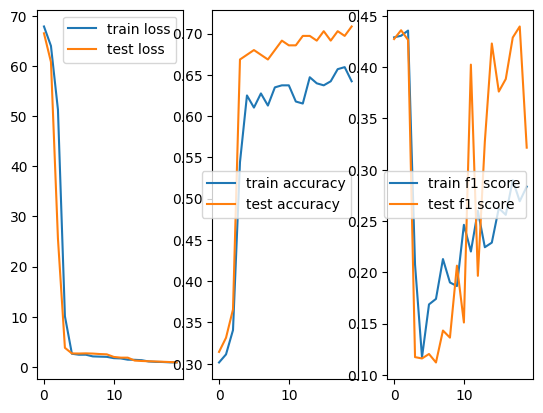

Model(
  (relu): ReLU()
  (layer_0): Linear(in_features=10, out_features=1, bias=True)
  (Sigmoid): Sigmoid()
)

In [ ]:
parameters_dict = {
    'in_features' : train_X.shape[1],
    'out_features' : 1,
    'batch_size' : 2**3,
    'epochs' : 20,
    'scheduler':False,
    'learning_rate': 0.001,
    'layers_output_size': [1]

}
trainloader = torch.utils.data.DataLoader(pandas_to_pytorch(train_X,train_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])

testloader = torch.utils.data.DataLoader(pandas_to_pytorch(test_X,test_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])
train_model(trainloader, testloader, parameters_dict)

final accuracy: 0.7085714340209961
final f1 score: 0.3215238095238095


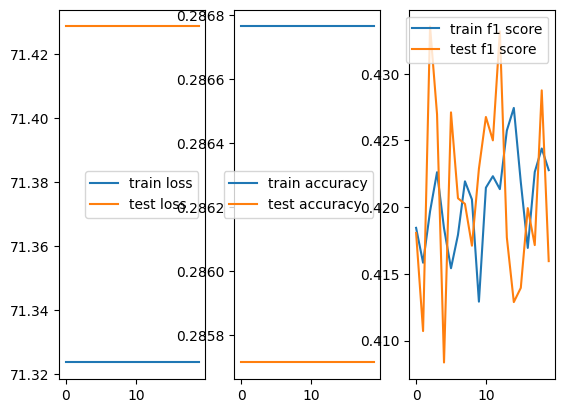

final accuracy: 0.2857142984867096
final f1 score: 0.415957375957376


Model(
  (relu): ReLU()
  (layer_0): Linear(in_features=10, out_features=5, bias=True)
  (layer_1): Linear(in_features=5, out_features=1, bias=True)
  (Sigmoid): Sigmoid()
)

In [ ]:
parameters_dict = {
    'in_features' : train_X.shape[1],
    'out_features' : 1,
    'batch_size' : 2**3,
    'epochs' : 20,
    'scheduler':False,
    'learning_rate': 0.001,
    'layers_output_size': [5,1]

}
trainloader = torch.utils.data.DataLoader(pandas_to_pytorch(train_X,train_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])

testloader = torch.utils.data.DataLoader(pandas_to_pytorch(test_X,test_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])
train_model(trainloader, testloader, parameters_dict)

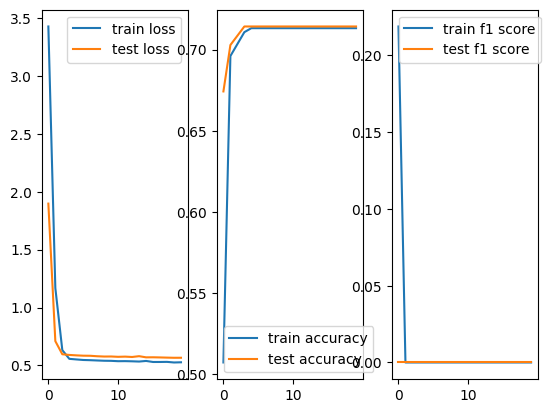

final accuracy: 0.7142857313156128
final f1 score: 0.0


Model(
  (relu): ReLU()
  (layer_0): Linear(in_features=10, out_features=5, bias=True)
  (layer_1): Linear(in_features=5, out_features=3, bias=True)
  (layer_2): Linear(in_features=3, out_features=1, bias=True)
  (Sigmoid): Sigmoid()
)

In [ ]:
parameters_dict = {
    'in_features' : train_X.shape[1],
    'out_features' : 1,
    'batch_size' : 2**3,
    'epochs' : 20,
    'learning_rate': 0.001,
    'scheduler':False,
    'layers_output_size': [5,3,1]

}
trainloader = torch.utils.data.DataLoader(pandas_to_pytorch(train_X,train_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])

testloader = torch.utils.data.DataLoader(pandas_to_pytorch(test_X,test_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])
train_model(trainloader, testloader, parameters_dict)

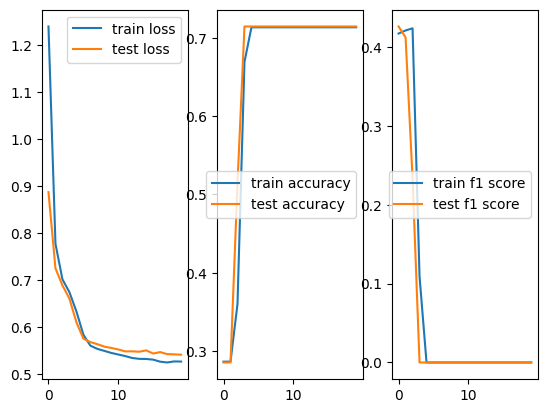

final accuracy: 0.7142857313156128
final f1 score: 0.0


Model(
  (relu): ReLU()
  (layer_0): Linear(in_features=10, out_features=7, bias=True)
  (layer_1): Linear(in_features=7, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=3, bias=True)
  (layer_3): Linear(in_features=3, out_features=1, bias=True)
  (Sigmoid): Sigmoid()
)

In [ ]:
parameters_dict = {
    'in_features' : train_X.shape[1],
    'out_features' : 1,
    'batch_size' : 2**3,
    'epochs' : 20,
    'scheduler':False,
    'learning_rate': 0.001,
    'layers_output_size': [7,5,3,1]

}
trainloader = torch.utils.data.DataLoader(pandas_to_pytorch(train_X,train_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])

testloader = torch.utils.data.DataLoader(pandas_to_pytorch(test_X,test_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])
train_model(trainloader, testloader, parameters_dict)

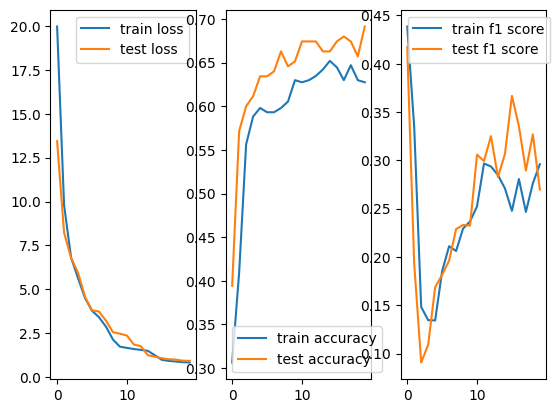

final accuracy: 0.691428542137146
final f1 score: 0.2697835497835498


Model(
  (relu): ReLU()
  (layer_0): Linear(in_features=10, out_features=7, bias=True)
  (layer_1): Linear(in_features=7, out_features=1, bias=True)
  (Sigmoid): Sigmoid()
)

In [ ]:
parameters_dict = {
    'in_features' : train_X.shape[1],
    'out_features' : 1,
    'batch_size' : 2**5,
    'epochs' : 20,
    'scheduler':False,
    'learning_rate': 0.001,
    'layers_output_size': [7,1]

}
trainloader = torch.utils.data.DataLoader(pandas_to_pytorch(train_X,train_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])

testloader = torch.utils.data.DataLoader(pandas_to_pytorch(test_X,test_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])
train_model(trainloader, testloader, parameters_dict)

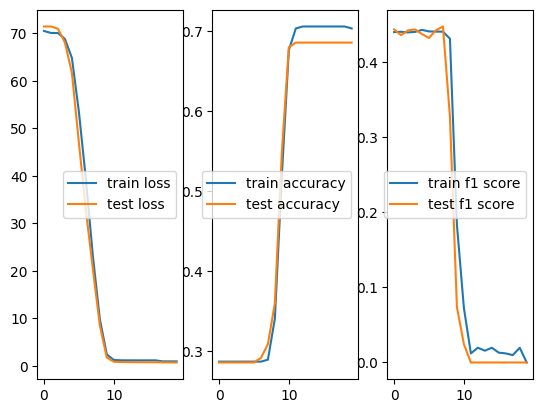

final accuracy: 0.6857143044471741
final f1 score: 0.0


Model(
  (relu): ReLU()
  (layer_0): Linear(in_features=10, out_features=2, bias=True)
  (layer_1): Linear(in_features=2, out_features=1, bias=True)
  (Sigmoid): Sigmoid()
)

In [ ]:
parameters_dict = {
    'in_features' : train_X.shape[1],
    'out_features' : 1,
    'batch_size' : 2**5,
    'epochs' : 20,
    'scheduler':False,
    'learning_rate': 0.001,
    'layers_output_size': [2,1]

}
trainloader = torch.utils.data.DataLoader(pandas_to_pytorch(train_X,train_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])

testloader = torch.utils.data.DataLoader(pandas_to_pytorch(test_X,test_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])
train_model(trainloader, testloader, parameters_dict)

This baseline model seems to be learning to predict 0 for all data. THis is why accuracy is approaching 70% (percent of 0 in the data is 70% and the f1 score is so low).
I think the best approach to deal with this would be to balance the data rather than making the neural network deeper.  Deeper networks do seem to approach equillibruim faster.  However, the final f1 score and accuracy are similar across all models.

I played around with batch size, number of layers and neurons of each layer.

The best results came from a batch size of 2**3, with 3 layers.  The layers had outputs of 5 nuerons, 3 neurons and 1 neuron respectively. Increasing the number of neurons in a layers seems to increase the variance between each epoch of training, which can be seen in the choppier f1 score and accuracy score plots.  This is especially clear in the two models above, where the models are identical aside from the number of neurons in the first layer.


**Describe your trials and outcomes of using different number of layers and number of neurons.**
The models with more layers seem to converge faster.

**How the architecture affects the model performance?**
deeper models converge faster, while wider models lead to higher variance.

**Does deep learning worth it in this case?**
In this case, the deeper models lead to higher accuracy scores but much lower f1-scores, and converge much faster.  This low f1 score is likely due to bias and appears in all models.  I bleieve deep learning is worth it in this case.

b. Train and test the model architecture developed in part (a) using the unbalanced
data while using normalization and standardization in this time. What did you
notice here? Does the neural network need this? After this step, it is your decision
to continue the next part by either using normalization, standardization, or the
original scale.

In [ ]:
normalizer = Normalizer()

In [ ]:
train_X_norm_scaled = pd.DataFrame(scaler.fit_transform(train_X_scaled.values), columns=train_X_scaled.columns, index=train_X_scaled.index)
test_X_norm_scaled = pd.DataFrame(scaler.fit_transform(test_X_scaled.values), columns=test_X_scaled.columns, index=test_X_scaled.index)

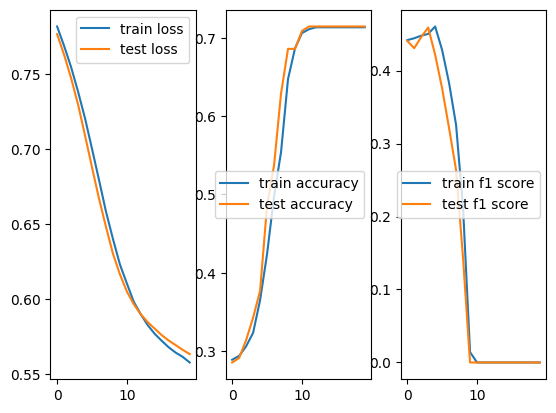

final accuracy: 0.7142857313156128
final f1 score: 0.0


Model(
  (relu): ReLU()
  (layer_0): Linear(in_features=10, out_features=5, bias=True)
  (layer_1): Linear(in_features=5, out_features=3, bias=True)
  (layer_2): Linear(in_features=3, out_features=1, bias=True)
  (Sigmoid): Sigmoid()
)

In [ ]:
parameters_dict = {
    'in_features' : train_X.shape[1],
    'out_features' : 1,
    'batch_size' : 2**5,
    'epochs' : 20,
    'scheduler':False,
    'learning_rate': 0.001,
    'layers_output_size': [5,3,1]

}
trainloader = torch.utils.data.DataLoader(pandas_to_pytorch(train_X_scaled,train_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])

testloader = torch.utils.data.DataLoader(pandas_to_pytorch(test_X_scaled,test_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])
train_model(trainloader, testloader, parameters_dict)

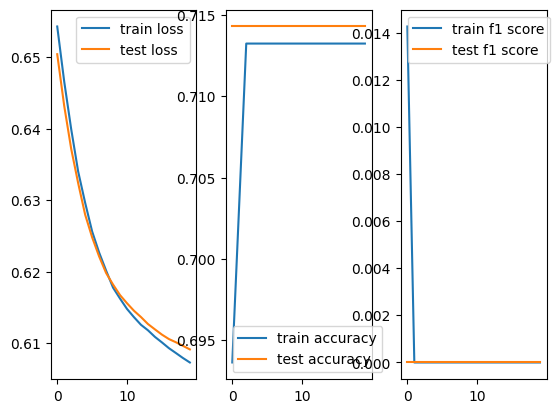

final accuracy: 0.7142857313156128
final f1 score: 0.0


Model(
  (relu): ReLU()
  (layer_0): Linear(in_features=10, out_features=5, bias=True)
  (layer_1): Linear(in_features=5, out_features=3, bias=True)
  (layer_2): Linear(in_features=3, out_features=1, bias=True)
  (Sigmoid): Sigmoid()
)

In [ ]:
parameters_dict = {
    'in_features' : train_X.shape[1],
    'out_features' : 1,
    'batch_size' : 2**5,
    'epochs' : 20,
    'scheduler':False,
    'learning_rate': 0.001,
    'layers_output_size': [5,3,1]

}
trainloader = torch.utils.data.DataLoader(pandas_to_pytorch(train_X_norm_scaled,train_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])

testloader = torch.utils.data.DataLoader(pandas_to_pytorch(test_X_norm_scaled,test_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])
train_model(trainloader, testloader, parameters_dict)

**What did you notice here?**

Scaling the data leads to a smoother curve of convergence, with both the accuracy and f1 score having less noise.
Normalizing has a similar effect, and leads to the model converging even faster.

**Does the neural network need this?**

The model does not seem to need this, as it still converges to the same accuracy and f1 score.  However, the model seems to converge faster so it does benefit from normalization and scaling.


I will continue with the scaled and normalized data.


####d. Knowing that the data is unbalanced, retrain and test the model after balancing the training set. Remember that we only balance the training set and leave the testing set as is. If you balance the training set, you can rely on the accuracy this time along with other measures. Please try at least two balancing techniques (recommended: one oversampling and one undersampling techniques). Discuss and compare between both techniques. Comment on their effectiveness on the training process.


I have chosen to do part d before part c because it is hard to compare models which are not performing well.  It is clear that the model is only predicting one class on the unbalanced data, which is leading to the accuracy = % of elements in class 1, and an f1 score of 0.

Instead i will fixing the unbalanced data first before continuing with the assignment.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

def balance(X,y):
  ros = RandomOverSampler()
  X_ros, y_ros = ros.fit_resample(X, y)
  return X_ros, y_ros
balanced_train_X,balanced_train_y = balance(train_X_norm_scaled,train_y)

In [ ]:
train_X.shape

(408, 10)

In [ ]:
sum(train_y)

117.0

Because of how little data we have, I have chosen to use random over sampling. I this case, we only have 408 samples in the training data, with 117 in class 2.

If we balanced the data with undersampling we will be left with only 234 samples in the training set.
A small sample size will lead to poor generalization.  In this case, the effects will be very noticable due to the small amount of data.

If we balance the data with random oversampling, then random samples from the smaller class will be repeated in the data.  In this case, we have 117 in class 2 and 291 in class 1.  Several samples from class 2 will be repeated 3 times in the balanced training set.  This will lead to overfitting of class 2 much faster than overfitting of class 1.  The impact of this will be poor generalization to the training set.

The effect of both sampling methods in poor generalization.  However with oversampling the poor generalization will mostly impact class 2.

Versions of SMOTE could also be used to rebalance the data.  SMOTE is a method of oversampling where examples of the under-represented are synthesized.


In [ ]:
balanced_train_y.sum()/len(balanced_train_y)

0.5

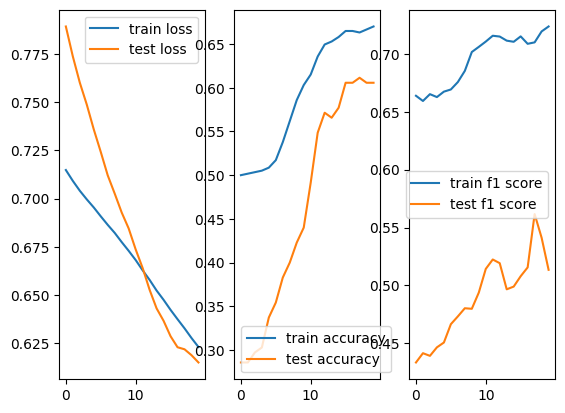

final accuracy: 0.6057142615318298
final f1 score: 0.5134799395668961


Model(
  (relu): ReLU()
  (layer_0): Linear(in_features=10, out_features=5, bias=True)
  (layer_1): Linear(in_features=5, out_features=3, bias=True)
  (layer_2): Linear(in_features=3, out_features=1, bias=True)
  (Sigmoid): Sigmoid()
)

In [ ]:
parameters_dict = {
    'in_features' : train_X.shape[1],
    'out_features' : 1,
    'batch_size' : 2**5,
    'epochs' : 20,
    'scheduler':False,
    'learning_rate': 0.001,
    'layers_output_size': [5,3,1]

}
trainloader = torch.utils.data.DataLoader(pandas_to_pytorch(balanced_train_X,balanced_train_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])

testloader = torch.utils.data.DataLoader(pandas_to_pytorch(test_X_norm_scaled,test_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])
train_model(trainloader, testloader, parameters_dict)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

def balance_under(X,y):
  rus = RandomUnderSampler()
  X_rus, y_rus = rus.fit_resample(X, y)
  return X_rus, y_rus
balanced_train_X_u,balanced_train_y_u = balance_under(train_X_norm_scaled,train_y)

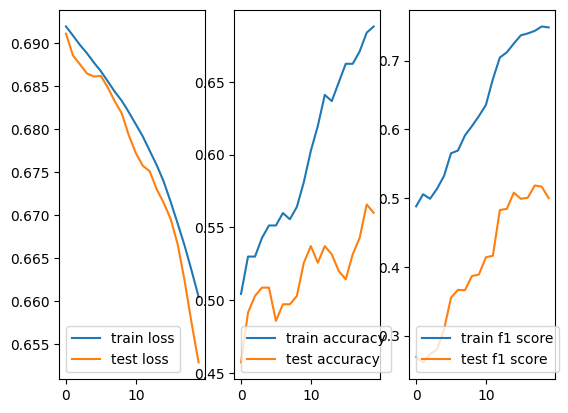

final accuracy: 0.5600000023841858
final f1 score: 0.4999094531199795


Model(
  (relu): ReLU()
  (layer_0): Linear(in_features=10, out_features=5, bias=True)
  (layer_1): Linear(in_features=5, out_features=3, bias=True)
  (layer_2): Linear(in_features=3, out_features=1, bias=True)
  (Sigmoid): Sigmoid()
)

In [ ]:
parameters_dict = {
    'in_features' : train_X.shape[1],
    'out_features' : 1,
    'batch_size' : 2**5,
    'epochs' : 20,
    'scheduler':False,
    'learning_rate': 0.001,
    'layers_output_size': [5,3,1]

}
trainloader = torch.utils.data.DataLoader(pandas_to_pytorch(balanced_train_X_u,balanced_train_y_u),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])

testloader = torch.utils.data.DataLoader(pandas_to_pytorch(test_X_norm_scaled,test_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])
train_model(trainloader, testloader, parameters_dict)

The model performs similarly on undersampled and oversampled data, with the oversampled model having a better f1 score and accuracy. The difference between the train and test accuracy of the the oversampled data is smaller than the difference of the undersampled data.

I will go ahead with oversampled data.  This makes sense, as undersampling is taking data out of the training set.  More (good) data always improves a model, while removing it makes it worse.

The model definitely needed balanced data.  Although the accuracy is much lower, the f1 score is no longer 0.  this indicated that the model is no longer learning to predict just one class.




c. Retrain and test the model using different learning rates, specifically 0.1 and
0.000001. Comment on the effect, advantages, disadvantages of each learning
rate. Then, use a learning rate schedular to update the learning rate. Compare
between the learning rate schedular and fixed learning rates.

0.1


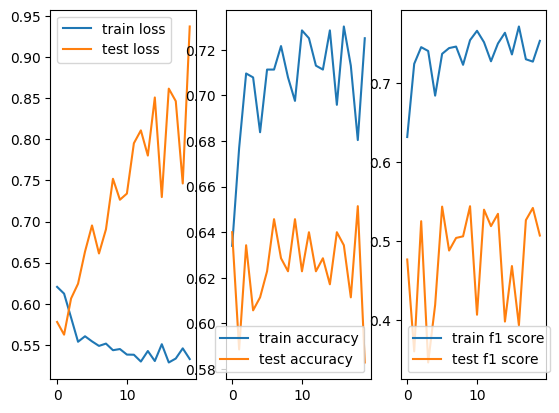

final accuracy: 0.5828571319580078
final f1 score: 0.5069788828682837
0.01


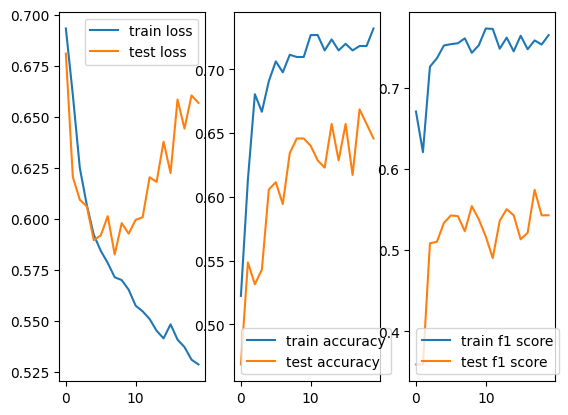

final accuracy: 0.645714282989502
final f1 score: 0.5427443159871004
0.001


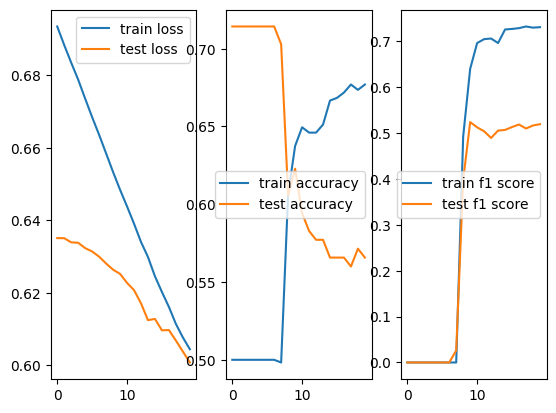

final accuracy: 0.5657142996788025
final f1 score: 0.519391660343067
0.0001


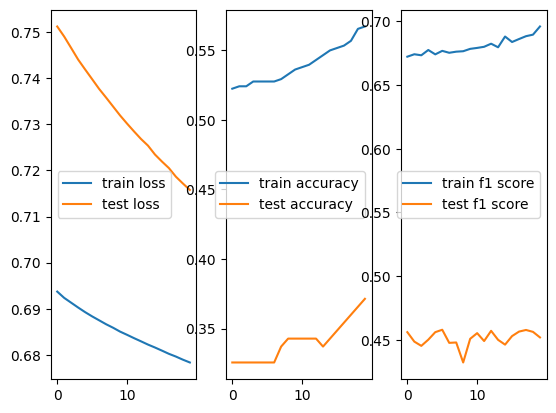

final accuracy: 0.37142857909202576
final f1 score: 0.4518090673417584
1e-05


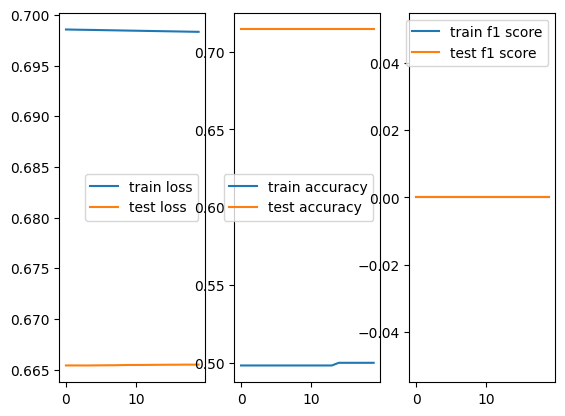

final accuracy: 0.7142857313156128
final f1 score: 0.0
1e-06


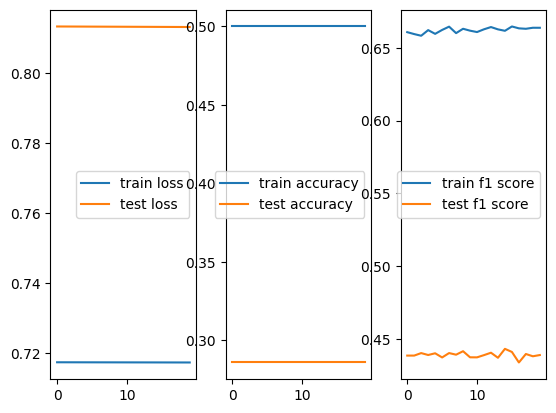

final accuracy: 0.2857142984867096
final f1 score: 0.4389599686783315


In [ ]:
trainloader = torch.utils.data.DataLoader(pandas_to_pytorch(balanced_train_X,balanced_train_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])

testloader = torch.utils.data.DataLoader(pandas_to_pytorch(test_X_norm_scaled,test_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])
for x in range(6):
  lr = x+1
  parameters_dict = {
      'in_features' : train_X.shape[1],
      'out_features' : 1,
      'batch_size' : 2**5,
      'epochs' : 20,
      'scheduler':False,
      'learning_rate': eval('1e-'+str(lr)),
      'layers_output_size': [5,3,1]

  }
  print(parameters_dict['learning_rate'])
  train_model(trainloader, testloader, parameters_dict)

A large learning rate makes the model to take bigger steps between each batch.  This can be good when the model first begins learning, but can cause the model to take to large "steps", and leads to overfitting. This is evident in the model with learning rate of 0.1.

Next, a too small learning rate causes the model to take too small steps between each batch.  This can cause the model to converge very very slowly, if at all.  THis can be very clearly seen in the model with a learning rate of 0.000001, where the model does not make any substancial improvements over each epoch.
The best learning rate is likely between 0.001 and 0.01.

Epoch 0: SGD lr 0.010000 -> 0.009500
Epoch 1: SGD lr 0.009500 -> 0.009000
Epoch 2: SGD lr 0.009000 -> 0.008500
Epoch 3: SGD lr 0.008500 -> 0.008000
Epoch 4: SGD lr 0.008000 -> 0.007500
Epoch 5: SGD lr 0.007500 -> 0.007000
Epoch 6: SGD lr 0.007000 -> 0.006500
Epoch 7: SGD lr 0.006500 -> 0.006000
Epoch 8: SGD lr 0.006000 -> 0.005500
Epoch 9: SGD lr 0.005500 -> 0.005000
Epoch 10: SGD lr 0.005000 -> 0.004500
Epoch 11: SGD lr 0.004500 -> 0.004000
Epoch 12: SGD lr 0.004000 -> 0.003500
Epoch 13: SGD lr 0.003500 -> 0.003000
Epoch 14: SGD lr 0.003000 -> 0.002500
Epoch 15: SGD lr 0.002500 -> 0.002000
Epoch 16: SGD lr 0.002000 -> 0.001500
Epoch 17: SGD lr 0.001500 -> 0.001000
Epoch 18: SGD lr 0.001000 -> 0.000500
Epoch 19: SGD lr 0.000500 -> 0.000000


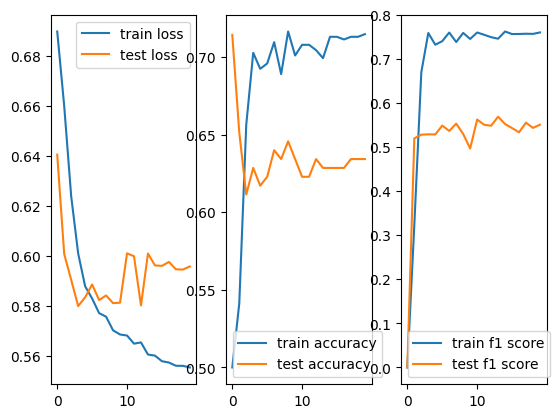

final accuracy: 0.6342856884002686
final f1 score: 0.5508367744758721


In [ ]:
parameters_dict = {
    'in_features' : train_X.shape[1],
    'out_features' : 1,
    'batch_size' : 2**5,
    'epochs' : 20,
    'scheduler':True,
    'learning_rate': 0.1,
    'layers_output_size': [5,3,1]

}
trainloader = torch.utils.data.DataLoader(pandas_to_pytorch(balanced_train_X,balanced_train_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])

testloader = torch.utils.data.DataLoader(pandas_to_pytorch(test_X_norm_scaled,test_y),
                                          shuffle=True,
                                          batch_size=parameters_dict['batch_size'])
model = train_model(trainloader, testloader, parameters_dict)

The scheduled linear decay LR performs better than all the models with fixed learning rates.  The accuracy and f1 score curves seem to be less choppy than the curves from the models with a set high lr, and the model does not overfit nearly as much as the models with a set high lr.  While the accuracy and f1 scores actually seem to move, unlike the models with the set low lr curves.  The advantage of a lr scheduler is that the model can make large moves at the beginning of training, allowing the model to get close to its optimal state. Then as the model coninutes to learn, the lr decreases, allowing the model to make smaller steps to get closer to the optimal model.

The model still seems to generalize poorly, this is due to overfitting and would likely be resolved with a larger data set.

e. Use a scatter plot at the end to plot the data points and show the decision boundary of
the best model you got on the same plot. Import the best model you got from
assignment #1 and show its decision boundary too. Compare both models, and comment
on the decision boundaries?


The best model from assigment 1 came from logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(balanced_train_X,balanced_train_y)
train_y_pred = LR.predict(balanced_train_X)
test_y_pred = LR.predict(test_X_norm_scaled)

In [ ]:
accuracy_score(train_y_pred, balanced_train_y)

0.7302405498281787

In [ ]:
f1_score(train_y_pred, balanced_train_y)

0.7660208643815201

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(LR, balanced_train_X,balanced_train_y)
top_2= results.importances_mean.argsort()[0:2]
balanced_train_X.columns[top_2]

Index(['Albumin_and_Globulin_Ratio', 'Gender'], dtype='object')

In [ ]:
[balanced_train_X.columns[top_2][0]]

['Albumin_and_Globulin_Ratio']

In [ ]:
test_X[balanced_train_X.columns[top_2]]

,Albumin_and_Globulin_Ratio,Gender
108,0.50,0
372,1.70,0
129,0.80,0
281,1.30,0
560,0.40,0
...,...,...
437,0.90,0
164,1.38,0
169,0.80,0
490,1.16,1


Text(0.5, 1.0, 'Logistic Regression Model from A1')

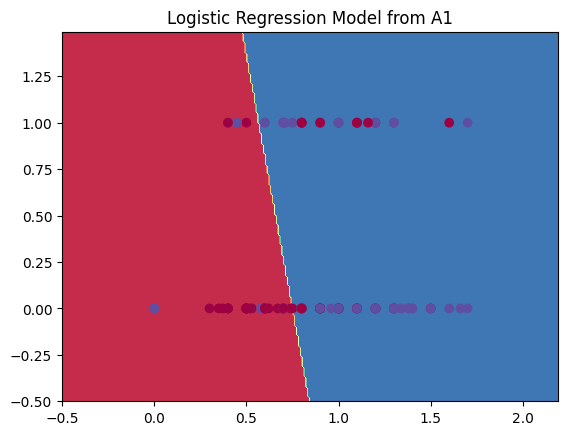

In [ ]:
from  sklearn.linear_model import LogisticRegressionCV
# Display plots inline and change default figure size
X = test_X[balanced_train_X.columns[top_2]].to_numpy()
y = test_y_pred
# Train the logistic rgeression classifier
clf = LogisticRegressionCV()
clf.fit(X, y)

# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
  # Set min and max values and give it some padding
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  h = 0.01
  # Generate a grid of points with distance h between them
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # Predict the function value for the whole gid
  Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  # Plot the contour and training examples
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression Model from A1")

In [ ]:
best_model_results = pd.Series([int(torch.round(model(x[0])).squeeze()) for x in pandas_to_pytorch(test_X_norm_scaled,test_y)])


Text(0.5, 1.0, 'Best NN Model')

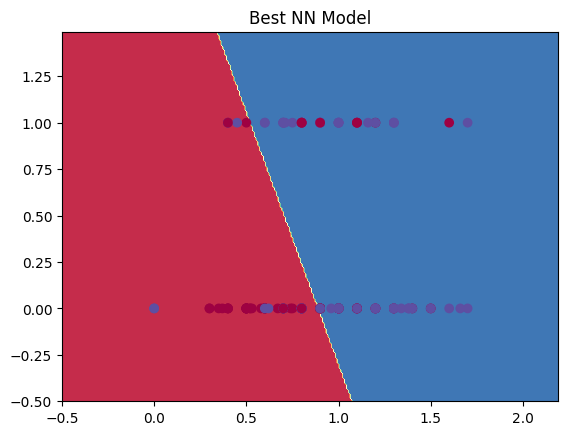

In [ ]:
from  sklearn.linear_model import LogisticRegressionCV
# Display plots inline and change default figure size
X = test_X[balanced_train_X.columns[top_2]].to_numpy()
y = best_model_results.to_numpy()
# Train the logistic rgeression classifier
clf = LogisticRegressionCV()
clf.fit(X, y)

# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
  # Set min and max values and give it some padding
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  h = 0.01
  # Generate a grid of points with distance h between them
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # Predict the function value for the whole gid
  Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  # Plot the contour and training examples
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Best NN Model")

The decision boundary on Albumin_and_Globulin_Ratio and Gender for the best NN model and the best model from assigment 1 (a logisitic regression) are very similar.
Gender and Albumin_and_Globulin_Ratio were chosen as the two parameters to compare the two models on because they are the most important features for the logistic regression model (best model from A1).

The models learn in very different ways but seem to find the same value in the two features.

Text(0.5, 1.0, 'Actual Y value')

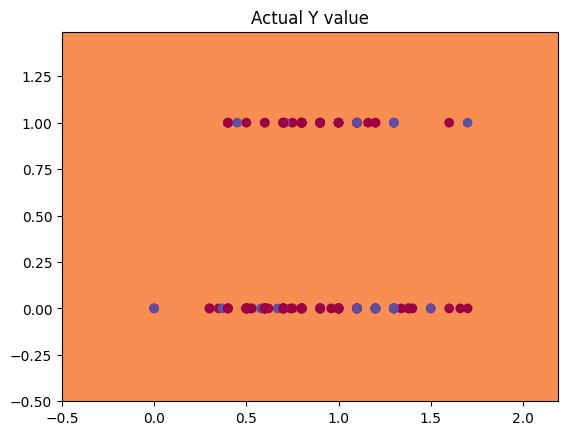

In [ ]:
from  sklearn.linear_model import LogisticRegressionCV
# Display plots inline and change default figure size
X = test_X[balanced_train_X.columns[top_2]].to_numpy()
y = test_y.to_numpy()
# Train the logistic rgeression classifier
clf = LogisticRegressionCV()
clf.fit(X, y)

# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
  # Set min and max values and give it some padding
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  h = 0.01
  # Generate a grid of points with distance h between them
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # Predict the function value for the whole gid
  Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  # Plot the contour and training examples
  plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Actual Y value")

Applying the same decision boundary formula for the two features and the target do not result in a boundary.  The models have identified a trend that can not be found with just these two features alone.